In [2]:
import requests
import pandas as pd
import time

In [4]:
c_df = pd.read_csv('./merged_output.csv')

In [6]:
df = c_df.copy()

In [7]:
df.rename(columns={df.columns[0]: 'timestamp'}, inplace=True)

# 判断时间戳单位并转换为日期时间
def convert_timestamp_to_datetime(timestamp):
    # 2025.01.01 的时间戳（秒为单位）
    threshold = pd.Timestamp('2025-01-01').timestamp() * 1e6
    
    if timestamp < threshold:
        # 毫秒时间戳
        return pd.to_datetime(timestamp, unit='ms')
    else:
        # 微秒时间戳
        return pd.to_datetime(timestamp, unit='us')

# 应用转换函数
df['datetime'] = df['timestamp'].apply(convert_timestamp_to_datetime)

# 设置为索引
df.set_index('datetime', inplace=True)

# 删除原始的 timestamp 列（可选）
df.drop(columns=['timestamp'], inplace=True)
df

,7195.24000000,7255.00000000,7175.15000000,7200.85000000,16792.38816500,1577923199999,121214452.11606228,194010,8946.95553500,64597785.21233434,0
datetime,,,,,,,,,,,
2020-01-01,7195.24,7255.00,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010,8946.955535,6.459779e+07,0
2020-01-02,7200.77,7212.50,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667,15141.611340,1.070608e+08,0
2020-01-03,6965.49,7405.00,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854,35595.496273,2.577131e+08,0
2020-01-04,7345.00,7404.00,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370,16369.382248,1.200351e+08,0
2020-01-05,7354.19,7495.00,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209,19455.369564,1.446001e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,99987.30,105865.22,99950.77,104077.48,39171.852920,1737158399999999,4.040994e+09,3886907,20673.213000,2.131223e+09,0
2025-01-18,104077.47,104988.88,102277.55,104556.23,24307.829980,1737244799999999,2.521522e+09,3403162,11607.512740,1.204171e+09,0
2025-01-19,104556.23,106422.43,99651.60,101331.57,43397.282980,1737331199999999,4.513424e+09,5271920,21079.510820,2.193271e+09,0


In [8]:
new_columns = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
    'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
    'Taker buy quote asset volume', 'Ignore'
]

# 重命名列
df.columns = new_columns


,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
datetime,,,,,,,,,,,
2020-01-01,7195.24,7255.00,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010,8946.955535,6.459779e+07,0
2020-01-02,7200.77,7212.50,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667,15141.611340,1.070608e+08,0
2020-01-03,6965.49,7405.00,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854,35595.496273,2.577131e+08,0
2020-01-04,7345.00,7404.00,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370,16369.382248,1.200351e+08,0
2020-01-05,7354.19,7495.00,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209,19455.369564,1.446001e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,99987.30,105865.22,99950.77,104077.48,39171.852920,1737158399999999,4.040994e+09,3886907,20673.213000,2.131223e+09,0
2025-01-18,104077.47,104988.88,102277.55,104556.23,24307.829980,1737244799999999,2.521522e+09,3403162,11607.512740,1.204171e+09,0
2025-01-19,104556.23,106422.43,99651.60,101331.57,43397.282980,1737331199999999,4.513424e+09,5271920,21079.510820,2.193271e+09,0


In [10]:
final_df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
final_df.to_csv('./btc-data.csv')

In [234]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Multiply, Lambda, Reshape
from tensorflow.keras import backend as K

backtest_df = pd.read_csv('./btc-data.csv')
# 选择特征和目标变量
# 技术指标
backtest_df['SMA_7'] = backtest_df['Close'].rolling(window=7).mean()
backtest_df['SMA_30'] = backtest_df['Close'].rolling(window=30).mean()
backtest_df['SMA_60'] = backtest_df['Close'].rolling(window=60).mean()
backtest_df['SMA_120'] = backtest_df['Close'].rolling(window=120).mean()

backtest_df['EMA_7'] = backtest_df['Close'].ewm(span=7, adjust=False).mean()
backtest_df['EMA_30'] = backtest_df['Close'].ewm(span=30, adjust=False).mean()

delta = backtest_df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
backtest_df['RSI'] = 100 - (100 / (1 + rs))

backtest_df['SMA_20'] = backtest_df['Close'].rolling(window=20).mean()
backtest_df['STD_20'] = backtest_df['Close'].rolling(window=20).std()
backtest_df['Upper_Band'] = backtest_df['SMA_20'] + (backtest_df['STD_20'] * 2)
backtest_df['Lower_Band'] = backtest_df['SMA_20'] - (backtest_df['STD_20'] * 2)

backtest_df['EMA_12'] = backtest_df['Close'].ewm(span=12, adjust=False).mean()
backtest_df['EMA_26'] = backtest_df['Close'].ewm(span=26, adjust=False).mean()
backtest_df['MACD'] = backtest_df['EMA_12'] - backtest_df['EMA_26']
backtest_df['Signal_Line'] = backtest_df['MACD'].ewm(span=9, adjust=False).mean()

# 滞后特征
backtest_df['Close_Lag1'] = backtest_df['Close'].shift(1)
backtest_df['Close_Lag7'] = backtest_df['Close'].shift(7)
backtest_df['Volume_Lag1'] = backtest_df['Volume'].shift(1)

# 波动率特征
backtest_df['Volatility_7'] = backtest_df['Close'].pct_change().rolling(window=7).std()
backtest_df['Volatility_60'] = backtest_df['Close'].pct_change().rolling(window=7).std()
backtest_df['Volatility_30'] = backtest_df['Close'].pct_change().rolling(window=30).std()

backtest_df.dropna(inplace=True)

# 选择特征
features = backtest_df[['Open', 'High', 'Low', 'Close', 'Volume',
                        'SMA_7', 'SMA_30', 'SMA_60', 'SMA_120', 'EMA_7', 'EMA_30', 'RSI',
                        'Upper_Band', 'Lower_Band', 'MACD', 'Signal_Line',
                        'Close_Lag1', 'Close_Lag7', 'Volume_Lag1',
                        'Volatility_7', 'Volatility_30', 'Volatility_60']].values


target = backtest_df['Close'].values


# 标准化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 将时间序列数据转换为监督学习格式
def create_dataset(features, target, time_step=5):
    X, y = [], []
    for i in range(len(features) - time_step):
        X.append(features[i:(i + time_step), :])  # 过去 time_step 天的特征
        y.append(target[i + time_step])           # 未来第 time_step 天的目标值
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_features, scaled_target, time_step=time_step)

# 划分训练集和测试集
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [235]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Multiply, Permute, Activation, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping


# 增强版模型构建函数（集成早停法）
def build_enhanced_model(time_step, n_features):
    inputs = Input(shape=(time_step, n_features))
    
    # 第一层LSTM（增加Dropout正则化）
    lstm1 = LSTM(50, return_sequences=True, 
                dropout=0.2,  # 时间步dropout
                recurrent_dropout=0.2)(inputs)  # 循环层dropout
    
    # 改进的注意力机制
    def attention_mechanism(inputs):
        time_steps = K.int_shape(inputs)[1]
        attention = Dense(1, activation='tanh')(inputs)
        attention = Reshape((time_steps,))(attention)
        attention = Activation('softmax')(attention)
        return Reshape((time_steps, 1))(attention)
    
    attention = attention_mechanism(lstm1)
    weighted = Multiply()([lstm1, attention])
    
    # 第二层LSTM（增加Dropout）
    lstm2 = LSTM(50, dropout=0.2)(weighted)
    
    # 全连接层
    dense = Dense(25, activation='relu', 
                 kernel_regularizer='l2')(lstm2)  # L2正则化
    output = Dense(1)(dense)
    
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse')
    return model

# 验证数据维度
print("X_train shape:", X_train.shape)  # 应为 (样本数, 5, 特征数)
print("y_train shape:", y_train.shape)  # 应为 (样本数,)

# 获取特征数量
n_features = X_train.shape[2]

# 构建并训练模型
model = build_enhanced_model(time_step, n_features)

early_stopping = EarlyStopping(
    monitor='val_loss',    # 监控验证集损失
    patience=15,           # 允许15个epoch无改进
    min_delta=0.001,       # 视为改进的最小变化
    restore_best_weights=True  # 恢复最佳模型权重
)

# 定义 LSTM 模型
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

X_train shape: (1031, 10, 22)
y_train shape: (1031, 1)


2025-01-22 10:08:37.416120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-22 10:08:37.418772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-22 10:08:37.419972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [236]:
model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping],  # 集成早停法
    validation_data=(X_test, y_test)
)

Epoch 1/200


2025-01-22 10:08:38.746607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-22 10:08:38.748324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-22 10:08:38.749595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 [==============================] - 3s 41ms/step - loss: 0.3500 - val_loss: 0.3160
Epoch 2/200
 1/17 [>.............................] - ETA: 0s - loss: 0.3014

2025-01-22 10:08:41.705542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-22 10:08:41.706837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-22 10:08:41.708118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 [==============================] - 0s 14ms/step - loss: 0.2696 - val_loss: 0.2567
Epoch 3/200
17/17 [==============================] - 0s 13ms/step - loss: 0.2161 - val_loss: 0.2018
Epoch 4/200
17/17 [==============================] - 0s 13ms/step - loss: 0.1770 - val_loss: 0.1681
Epoch 5/200
17/17 [==============================] - 0s 13ms/step - loss: 0.1454 - val_loss: 0.1425
Epoch 6/200
17/17 [==============================] - 0s 15ms/step - loss: 0.1192 - val_loss: 0.1180
Epoch 7/200
17/17 [==============================] - 0s 14ms/step - loss: 0.0973 - val_loss: 0.0962
Epoch 8/200
17/17 [==============================] - 0s 14ms/step - loss: 0.0792 - val_loss: 0.0806
Epoch 9/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0642 - val_loss: 0.0675
Epoch 10/200
17/17 [==============================] - 0s 15ms/step - loss: 0.0521 - val_loss: 0.0541
Epoch 11/200
17/17 [==============================] - 0s 22ms/step - loss: 0.0418 - val_loss: 0.0477
Epoch 12/2

In [237]:
# 使用模型预测未来价格
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 反标准化预测结果
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

def timing_strategy(predictions, actual, threshold=1e-3):
    signals = []
    for i in range(1, len(predictions)):
        price_change = (predictions[i] - actual[i - 1]) / actual[i - 1]  # 计算价格变化百分比
        if price_change > threshold:  # 预测价格上涨超过阈值
            signals.append(1)
        elif price_change < 0:  # 预测价格下跌超过阈值
            signals.append(0)
    return signals

# 应用择时策略
signals = timing_strategy(test_predict, scaler.inverse_transform(y_test.reshape(-1, 1)))
print("择时信号:", signals)

 1/33 [..............................] - ETA: 20s

2025-01-22 10:08:56.652325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-22 10:08:56.654128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-22 10:08:56.656073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 0s 2ms/step
择时信号: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [238]:
close_df = backtest_df.tail(len(signals))
close_df = close_df.copy()

close_df.loc[:,'signal'] = signals
close_df = close_df.set_index('datetime')
close_df.index = pd.to_datetime(close_df.index)
close_df.head(10)

,Open,High,Low,Close,Volume,SMA_7,SMA_30,SMA_60,SMA_120,EMA_7,...,EMA_26,MACD,Signal_Line,Close_Lag1,Close_Lag7,Volume_Lag1,Volatility_7,Volatility_60,Volatility_30,signal
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-09,21704.37,21834.99,20042.72,20362.22,443658.28584,21972.395714,23005.619667,22431.474667,19621.326750,21879.022668,...,22691.106704,-365.060569,-22.370057,21705.44,23465.32,301460.57272,0.025600,0.025600,0.029363,1
2023-03-10,20362.21,20367.78,19549.09,20150.69,618456.46710,21657.588571,22911.876000,22481.015167,19642.572917,21446.939501,...,22502.927689,-511.551728,-120.206391,20362.22,22354.34,443658.28584,0.022600,0.022600,0.029350,1
2023-03-11,20150.69,20686.51,19765.03,20455.73,427831.82133,21387.468571,22867.188667,22531.266333,19670.784750,21199.137126,...,22351.283416,-596.160680,-215.397249,20150.69,22346.57,618456.46710,0.024860,0.024860,0.028164,1
2023-03-12,20455.73,22150.00,20270.60,21997.11,430944.94288,21325.592857,22879.586000,22598.830500,19713.993333,21398.630344,...,22325.048348,-532.696802,-278.857160,20455.73,22430.24,427831.82133,0.041629,0.041629,0.031446,1
2023-03-13,21998.05,24500.00,21813.88,24113.48,687889.31259,21568.947143,22954.617000,22686.611500,19778.856917,22077.342758,...,22457.524767,-308.076536,-284.701035,21997.11,22410.00,430944.94288,0.055833,0.055833,0.035909,1
2023-03-14,24112.27,26386.87,23976.42,24670.41,699360.93423,21922.154286,23050.846000,22765.618167,19845.948167,22725.609569,...,22621.442191,-84.153688,-244.591565,24113.48,22197.96,687889.31259,0.055116,0.055116,0.036048,1
2023-03-15,24670.41,25196.97,23896.95,24285.66,581450.72984,22290.757143,23134.569000,22821.130500,19907.490583,23115.622176,...,22744.717585,61.551149,-183.363023,24670.41,21705.44,699360.93423,0.054397,0.054397,0.036229,0
2023-03-16,24285.66,25167.40,24123.00,24998.78,439421.32998,22953.122857,23227.867000,22889.918500,19976.957417,23586.411632,...,22911.685171,231.892988,-100.311820,24285.66,20362.22,581450.72984,0.041670,0.041670,0.036415,0
2023-03-17,24998.78,27756.84,24890.00,27395.13,624460.68091,23988.042857,23330.236333,22993.409833,20066.145500,24538.591224,...,23243.792195,553.870862,30.524716,24998.78,20150.69,439421.32998,0.043619,0.043619,0.036430,0


100%|██████████| 2/2 [00:00<00:00,  5.34it/s]


<Axes: title={'center': 'Equity Progression'}>

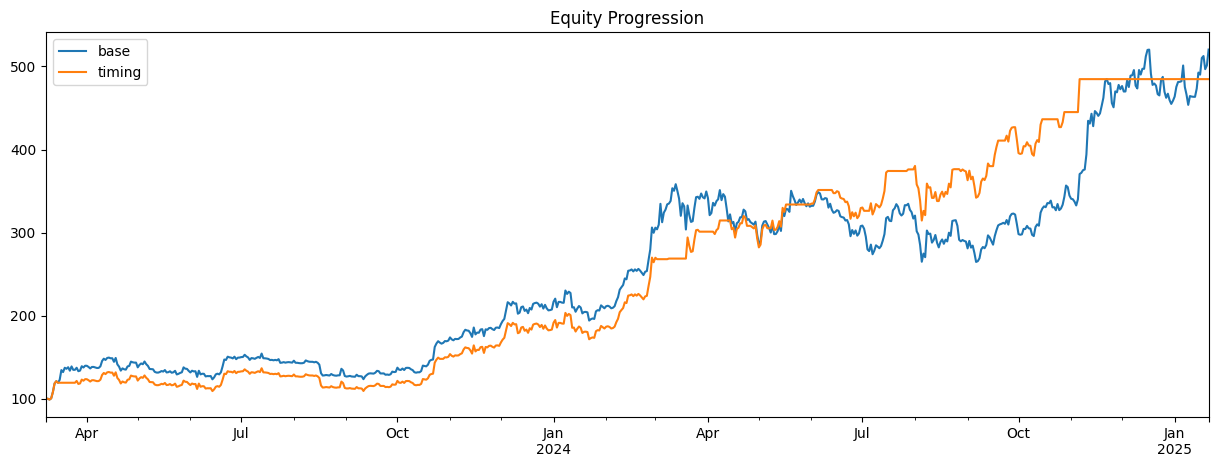

In [239]:
import bt 

price_df = close_df[['Close']]
signal_df = close_df[['signal']]

price_df.columns = signal_df.columns = ['btc']

base =  bt.Strategy('base', [bt.algos.SelectAll(), bt.algos.WeighEqually(), bt.algos.Rebalance()])

timing = bt.Strategy('timing', [bt.algos.SelectAll(), bt.algos.WeighTarget(signal_df), bt.algos.Rebalance()])


base_bt = bt.Backtest(base, price_df)
timing_bt =  bt.Backtest(timing, price_df)
# we include test here to see the results side-by-side
res2 = bt.run(base_bt, timing_bt)

res2.plot()

In [240]:
res2.display()

Stat                 base        timing
-------------------  ----------  ----------
Start                2023-03-08  2023-03-08
End                  2025-01-21  2025-01-21
Risk-free rate       0.00%       0.00%

Total Return         420.33%     384.75%
Daily Sharpe         1.71        1.92
Daily Sortino        3.24        3.65
CAGR                 140.95%     132.02%
Max Drawdown         -26.13%     -20.00%
Calmar Ratio         5.39        6.60

MTD                  13.42%      0.00%
3m                   57.50%      11.07%
6m                   55.68%      29.55%
YTD                  13.42%      0.00%
1Y                   155.10%     168.95%
3Y (ann.)            140.95%     132.02%
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  140.95%     132.02%

Daily Sharpe         1.71        1.92
Daily Sortino        3.24        3.65
Daily Mean (ann.)    68.77%      63.50%
Daily Vol (ann.)     40.29%      33.01%
Daily Skew           0.57        0.96
Dail